In [72]:
import requests
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import tweepy
import json
from bs4 import BeautifulSoup as soup

# Loading and reading data 

In [2]:
tweet_archive=pd.read_csv('twitter-archive-enhanced-2.csv')
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
consumer_key = 'CJbgKkhSqrLtITZWp7T1bK6fM'
consumer_secret = 'uR3efBe5xPcBBLyP6DIisgLS3o2HWo44HakTX6NaR8ee9SUVOp'
access_token = '1082733232821583872-k0gXDmmu0l02o4PM6fPdDD4cvolPTh'
access_secret = 'vChghsGs0FkIwMZzrmzcecXLCt0CZ4asRYDq9wWmEix1h'



In [4]:
image_prediction=pd.read_csv('image-predictions.tsv',sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
tweet_ids = tweet_archive.tweet_id.tolist()
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
tweets= []
deleted_tweet_list = []

with open('tweets.txt', 'w', encoding = 'utf-8') as file:
    for t_id in tweet_ids:
        try:
            tweets.append(api.get_status(t_id, tweet_mode = 'extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json)    
        except Exception as e:
            deleted_tweet_list.append(t_id)
file.write(json.dumps(tweets))

# Creating a dataframe and write to CSV the tweet IDs that were not found in the API 
deleted_tweet_ID = pd.DataFrame(deleted_tweet_list)
deleted_tweet_ID.to_csv('deleted_tweets.csv', sep = ',', encoding='utf-8')

Rate limit reached. Sleeping for: 622
Rate limit reached. Sleeping for: 616


In [8]:
# Reading in the .txt file for the expanded tweet information 
# and putting it in a dataframe 
with open('tweets.txt','r') as tweets:
    tweet_data = json.loads(tweets.read()) 
    
tweet_JSON = pd.DataFrame(tweet_data)

In [9]:
# Reading in the CSV of tweet IDs not found in Tweepy API.
tweets_without_extended_data = pd.read_csv('deleted_tweets.csv')

# Assessment

Each data set is copied and assessed for flaws

In [10]:
#Copies for each dataframe is made
df1=tweet_archive.copy()
df2=tweet_JSON.copy()
df3=image_prediction.copy()

In [11]:
#looking at df1 dataset
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
#checking for null values in df1
df1[df1.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
#checking info of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [378]:
#checking df1 summary statistics
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
#checking for duplicate values
df1[df1.duplicated()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
#checking for null values in tweet id
df1[df1['tweet_id']==np.nan]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [16]:
#looking at df2 dataset
df2.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37871,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,8264,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32542,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,6108,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24503,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,4043,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41231,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8412,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39398,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,9110,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [17]:
#looking at info of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2339 non-null object
display_text_range               2339 non-null object
entities                         2339 non-null object
extended_entities                2066 non-null object
favorite_count                   2339 non-null int64
favorited                        2339 non-null bool
full_text                        2339 non-null object
geo                              0 non-null object
id                               2339 non-null int64
id_str                           2339 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [18]:
#looking at df3 dataset
df3.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
#checking duplicate values for df3
df3[df3.duplicated()==True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [20]:
#checking info for df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df3[df3['tweet_id']==np.nan]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [22]:
#checking statistics summary for df3
df3.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


# Tidiness issues:
1.Lack of seperate column dog stage that contains observations from duggo,floofer,pupper and puppo.
<br>
2.Data which has images should only be considered for analysis.
<br>
3.Retweet count and favourite count has to be added.
<br>

# Quality issues:

1.The ratings are wrong and needs to be normalized.
<br>
2.Seperate columns for dog prediction and probability of confidence is required that contains observations from columns 'p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'.
<br>
3.Presence of html anchor tabs in expanded_url column.
<br>
4.Some dog names are none instead of NA.
<br>
5.Presence of rating and link in text which needs to be stripped.
<br>
6.Retweets doesn't fit into the data analysis and needs to be removed.
<br>
7.in_reply_to_status_id and in_reply_to_user_id needs to be removed as it doesn't fit into the data analysis.
<br>
8.Irrelevant names starting with small letters.
<br>
9.Erroneous datatype of tweed_id in df1 and df3. 
<br>
10.Erroneous datatype of stage in df1.
<br>
11.Erroneous datatype of timestamp.
<br>
12.Erroneous datatype of retweet_counts and favorite counts. 


# Cleaning data:
***The above issues are taken care and tested***

**Issue:** The retweets doesn't fit into the analysis being done

**Define:** Remove the retweets

In [23]:
df1=df1.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [24]:
df2=df2.drop(['retweeted_status'],axis=1)

**Test:** 

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ KB


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2339 non-null object
display_text_range               2339 non-null object
entities                         2339 non-null object
extended_entities                2066 non-null object
favorite_count                   2339 non-null int64
favorited                        2339 non-null bool
full_text                        2339 non-null object
geo                              0 non-null object
id                               2339 non-null int64
id_str                           2339 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

**Issue:** Presence of reply status id and user id which is not required for this data analysis

**Define:** Drop the in_reply_to_status_id and in_reply_to_user_id columns

In [27]:
df1=df1.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


**Issue:** tweet id in df1 is an integer

**Define:** convert integer to str

In [29]:
df1['tweet_id']=df1['tweet_id'].astype(str)

**Test:**

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(2), object(10)
memory usage: 221.0+ KB


**Issue:** tweet id in df3 is integer

**Define:** convert integer to str 

In [31]:
df3['tweet_id']=df3['tweet_id'].astype(str)

**Test:**

In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**Issue:** A seperate column that mention about dog stage is required

**Define:**
A seperate column stage has to be added.Colmns such as doggo,floofer,pupper & puppo are dropped

In [33]:
df1.doggo=df1['doggo'].str.replace('None','')
df1.floofer=df1['floofer'].str.replace('None','')
df1.pupper=df1['pupper'].str.replace('None','')
df1.puppo=df1['puppo'].str.replace('None','')
df1["stage"] = df1["doggo"].str.cat(df1[["floofer",'pupper','puppo']])

In [34]:
df1['stage']=df1['stage'].replace('',np.nan)

In [35]:
df1=df1.drop(['doggo','floofer','pupper','puppo'],axis=1)

**Test:**

In [36]:
df1['stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
stage                 380 non-null object
dtypes: int64(2), object(7)
memory usage: 165.7+ KB


In [38]:
df1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


**Issue:** Erroneous datatype for dog stage 

**Define:** Convert datype to categorical

In [39]:
df1['stage']=df1['stage'].astype('category')

**Test:**

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
stage                 380 non-null category
dtypes: category(1), int64(2), object(6)
memory usage: 150.0+ KB


**Issue:** Presence of rating and link in text 

**Define:** Strip rating and link

In [41]:
df1.text = df1.text.str.split('/').str[0].str.replace('\d+','')

**Test:**

In [42]:
df1.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal.,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


**Issue:** Irrelevant names starting with small letters are present

**Define:** Assign those names as none 

In [43]:
df1['name'][df1['name'].str.match('[a-z]+')]='None'

C:\Users\saluv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Test:**

In [44]:
df1['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooe

**Issue:**None is present in name

**Define:** replace none with NA

In [45]:
df1['name']=df1['name'].replace('None',np.nan)

**Test:**

In [46]:
df1['name'].head(10)

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
5         NaN
6         Jax
7         NaN
8        Zoey
9      Cassie
Name: name, dtype: object

**Issue:** datatype of date in df1 is erroneous

**Define:** convert datatype of date to datetime

In [47]:
df1['timestamp']=pd.to_datetime(df1['timestamp'])

**Test:**

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1502 non-null object
stage                 380 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 150.0+ KB


**Issue:**
erroneous datatype for retweet count and favourite count in df2


**Define:** Convert retweet count and favourite count to integer


In [49]:
df2.retweet_count=df2.retweet_count.astype(int)
df2.favorite_count=df2.favorite_count.astype(int)

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2339 non-null object
display_text_range               2339 non-null object
entities                         2339 non-null object
extended_entities                2066 non-null object
favorite_count                   2339 non-null int32
favorited                        2339 non-null bool
full_text                        2339 non-null object
geo                              0 non-null object
id                               2339 non-null int64
id_str                           2339 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

**Issue:**Ratings are wrong

**Define:** Create a seperate column called rating and normalize the rating by multiplying numerator with 10 and dividing the denominator

In [51]:
df1.loc[df1['rating_denominator']!=10,['tweet_id','rating_numerator','rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
313,835246439529840640,960,0
342,832088576586297345,11,15
433,820690176645140481,84,70
516,810984652412424192,24,7
784,775096608509886464,9,11
902,758467244762497024,165,150
1068,740373189193256964,9,11
1120,731156023742988288,204,170
1165,722974582966214656,4,20
1202,716439118184652801,50,50


In [52]:
df1['rating']=(df1['rating_numerator']*10)/df1['rating_denominator']


**Test:**

In [53]:
df1['rating'].unique()

array([1.30000000e+01, 1.20000000e+01, 1.40000000e+01, 5.00000000e+00,
       1.70000000e+01, 1.10000000e+01, 1.00000000e+01, 4.20000000e+02,
       6.66000000e+02, 6.00000000e+00, 1.50000000e+01, 1.82000000e+02,
                  inf, 0.00000000e+00, 7.50000000e+01, 7.33333333e+00,
       7.00000000e+00, 9.00000000e+00, 3.42857143e+01, 8.00000000e+00,
       1.00000000e+00, 2.70000000e+01, 3.00000000e+00, 8.18181818e+00,
       4.00000000e+00, 1.77600000e+03, 2.00000000e+00, 6.36363636e+00,
       1.25000000e+01, 2.60000000e+01])

**some ratings are really high.Since whether these ratings are right or wrong is unknown, it is ignored.**

**Issue:**Presence of html anchor tabs

**Define:** Removing html anchor tabs

In [54]:
df1.source=df1.source.str.replace(r'<(?:a\b[^>]*>|/a>)','')


**Test:**

In [55]:
df1.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,13.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,13.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,12.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal.,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,13.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,12.0


**Issue:** Some predictions are not dog and and there are no possible breed

**Define:** Seperate column called predicted breed and p_conf is formed for most possible breed of dog

In [56]:
df3['predicted_breed']=' '
df3.predicted_breed[(df3.p1_dog!=True)&(df3.p2_dog!=True)&(df3.p3_dog!=True)]='NONE'
df3.predicted_breed[(df3.p1_dog==True)&(df3.p2_dog==True)&(df3.p3_dog==True)]=df3.p1
df3.predicted_breed[(df3.p1_dog!=True)&(df3.p2_dog==True)&(df3.p3_dog==True)]=df3.p2
df3.predicted_breed[(df3.p1_dog==True)&(df3.p2_dog==True)&(df3.p3_dog!=True)]=df3.p1
df3.predicted_breed[(df3.p1_dog==True)&(df3.p2_dog!=True)&(df3.p3_dog==True)]=df3.p1
df3.predicted_breed[(df3.p1_dog!=True)&(df3.p2_dog!=True)&(df3.p3_dog==True)]=df3.p3
df3.predicted_breed[(df3.p1_dog==True)&(df3.p2_dog!=True)&(df3.p3_dog!=True)]=df3.p1
df3.predicted_breed[(df3.p1_dog!=True)&(df3.p2_dog==True)&(df3.p3_dog!=True)]=df3.p2
df3.predicted_breed=df3.predicted_breed.replace('NONE',np.nan)

C:\Users\saluv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\saluv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\saluv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\saluv\Anaconda3\lib\

In [57]:
df3['p_conf']=' '
df3.p_conf[(df3.p1_dog!=True)&(df3.p2_dog!=True)&(df3.p3_dog!=True)]=0
df3.p_conf[(df3.p1_dog==True)&(df3.p2_dog==True)&(df3.p3_dog==True)]=df3.p1_conf
df3.p_conf[(df3.p1_dog!=True)&(df3.p2_dog==True)&(df3.p3_dog==True)]=df3.p2_conf
df3.p_conf[(df3.p1_dog==True)&(df3.p2_dog==True)&(df3.p3_dog!=True)]=df3.p1_conf
df3.p_conf[(df3.p1_dog==True)&(df3.p2_dog!=True)&(df3.p3_dog==True)]=df3.p1_conf
df3.p_conf[(df3.p1_dog!=True)&(df3.p2_dog!=True)&(df3.p3_dog==True)]=df3.p3_conf
df3.p_conf[(df3.p1_dog==True)&(df3.p2_dog!=True)&(df3.p3_dog!=True)]=df3.p1_conf
df3.p_conf[(df3.p1_dog!=True)&(df3.p2_dog==True)&(df3.p3_dog!=True)]=df3.p2_conf


C:\Users\saluv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\saluv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\saluv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\saluv\Anaconda3\lib\

In [58]:
df3=df3.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

**Test:**

In [59]:
df3.head()

,tweet_id,jpg_url,img_num,predicted_breed,p_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


**Issue:** data which has images should only be considered  

**Define:** df1 and df3 are merged

In [60]:
df1=df1.merge(df3,on='tweet_id',how='left')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1502 non-null object
stage                 380 non-null category
rating                2356 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
predicted_breed       1751 non-null object
p_conf                2075 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 260.4+ KB


**Test:**

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2339 non-null object
display_text_range               2339 non-null object
entities                         2339 non-null object
extended_entities                2066 non-null object
favorite_count                   2339 non-null int32
favorited                        2339 non-null bool
full_text                        2339 non-null object
geo                              0 non-null object
id                               2339 non-null int64
id_str                           2339 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

**Issue:** favorit count, retweet count is required in df1

**Define:** merge favorite count and retweet count from df2 to df1 

In [62]:
#create dataframe df4 consisting of column such as id,favorite count,retweet count
df4=df2[['id_str','favorite_count','retweet_count']]
df4=df4.rename(index=str,columns={'id_str':'tweet_id'})

In [63]:
df4.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37871,8264
1,892177421306343426,32542,6108
2,891815181378084864,24503,4043
3,891689557279858688,41231,8412
4,891327558926688256,39398,9110


In [64]:
df1=pd.merge(df1,df4,how='left',on='tweet_id')

**Test:**

In [65]:
df1.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,rating,jpg_url,img_num,predicted_breed,p_conf,favorite_count,retweet_count
2351,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a st generation vulpix. Enjoys s...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,5.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,106.0,42.0
2352,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,6.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,292.0,136.0
2353,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,9.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,123.0,43.0
2354,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,7.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,125.0,46.0
2355,666020888022790149,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,8.0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,2529.0,498.0


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1502 non-null object
stage                 380 non-null category
rating                2356 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
predicted_breed       1751 non-null object
p_conf                2075 non-null object
favorite_count        2339 non-null float64
retweet_count         2339 non-null float64
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(8)
memory usage: 297.2+ KB


# Storing the cleaned data

In [67]:
df1.to_csv('twitter_clean_data.csv')

**Reading the stored data**

In [68]:
df=pd.read_csv('twitter_clean_data.csv')

In [69]:
df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,rating,jpg_url,img_num,predicted_breed,p_conf,favorite_count,retweet_count
0,0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.000000,37871.0,8264.0
1,1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,32542.0,6108.0
2,2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,24503.0,4043.0
3,3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal.,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,41231.0,8412.0
4,4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,39398.0,9110.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
Unnamed: 0            2356 non-null int64
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2343 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1502 non-null object
stage                 380 non-null object
rating                2356 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
predicted_breed       1751 non-null object
p_conf                2075 non-null float64
favorite_count        2339 non-null float64
retweet_count         2339 non-null float64
dtypes: float64(5), int64(4), object(8)
memory usage: 313.0+ KB


## Analyzing and visualizing data

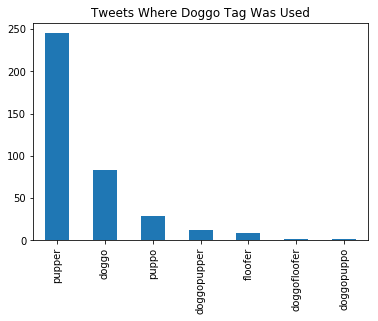

In [73]:
df['stage'].value_counts().plot(kind='bar',title='Tweets Where Doggo Tag Was Used',color=sb.color_palette()[0])

*pupper have the highest count in the data and doggofloofer the least*

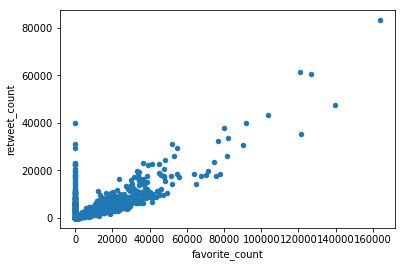

In [74]:
df.plot(kind='scatter',x='favorite_count',y='retweet_count')

*retweet_count and favorite_count are positively correlated*

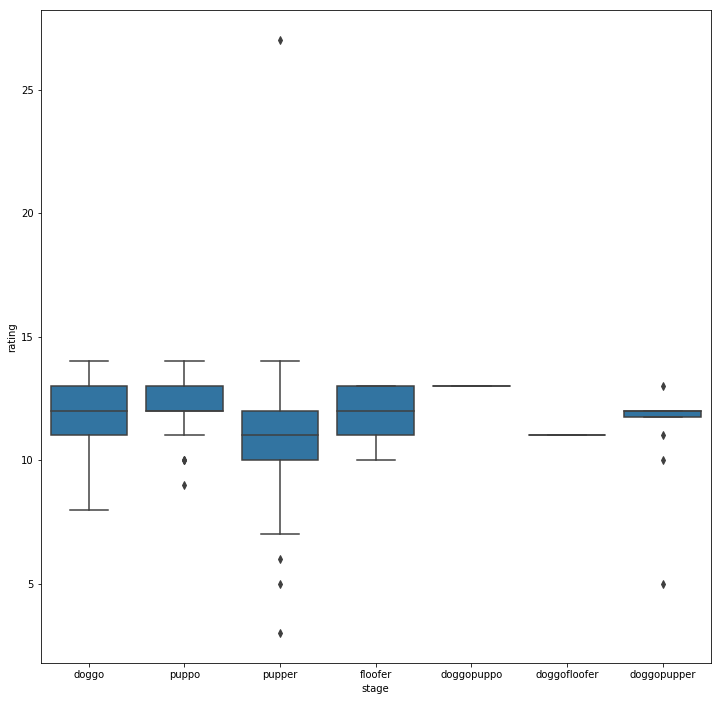

In [75]:
plt.figure(figsize=[12,12])
sb.boxplot(data=df,x='stage',y='rating',color=sb.color_palette()[0])

*The overall rating is almost in the same range for all stages with pupper in lower end and doggo & pupo in higher end.*

Text(0,0.5,'rating')

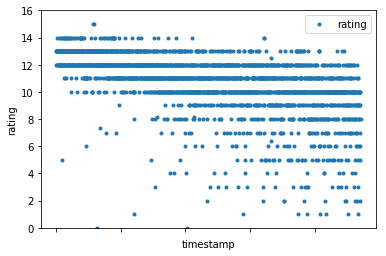

In [76]:
ax=df.plot(x='timestamp',y='rating',ylim=[0,16],style='.')
ax.set_ylabel('rating')

*From the graph one could observe that mostly,irrespective of the time the rating given is 12.* 